# Stroop Effect Test Investigation

This jupyter notebook is my submission for the P1 section of the Data Analyst Nanodegree project 'Statistics: The Science of Decisions'. Each section of this notebook corresponds to a question from the [project Instructions page](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True).

### Question 1:
** *What is our independent variable? What is our dependent variable?* **

The independent variable is the word set a participant is given (congruent or incongruent) and the dependent variable is the time it takes a participant in the experiment to name the ink colors in the two equally-sized lists.

### Question 2:
** *What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.* **

An appropriate set of hypotheses that may allow us to make inferences about the population of possible Stroop Effect test takers are:
* Null Hypothesis ($H_0$): The population mean for the Congruent task is equal to the population mean for the Incongruent task.
* Alternative Hypothesis ($H_1$): The population mean for the Congruent task is NOT equal to the population mean for the Incongruent task.

The parameters for the hypothesis test are:

* Let X = the time to name the colors from a Congruent set words list

* Let Y = the time to name the colors from a Incongruent set words list

* The sample size for both the Congruent set ($n_x$) and Incongruent set ($n_y$) is 24, which is less than 30 and requires the hypothesis test to follow a t-distribution with $n_x + n_y - 2$ degrees of freedom.

* We do not know the population's standard deviation so the unbiased estimator for standard deviation for each population, $\hat{s}_x$ and $\hat{s}_y$, will be used. 

* The populations are assumed to be normally distributed, and this assumption is supported by a Normal Quantile Quantile plot shown in a later section of this notebook.

* The Stroop Effect test experiment is assumed to have been conducted with independent random samples for both the Congruent and Incongruent task populations. The values in either condition do not effect the other.

Therefore our test of hypothesis will be a two-tailed pooled-variance t-test with variances assumed to be equal:
$$H_0:\mu_x=\mu_y \text{ versus } H_1:\mu_x \ne \mu_y$$

### Question 3:
** *Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.* **

The following two sub-sections of this notebook contain a data set along with descriptive statistics for each. The first is the 'Udacity data set', which contains twenty four participants' recorded times for both the congruent and incongruent tasks. The second is the 'University of Washington data set' which is a set of grouped data that I captured manually from the last page in the sequence of pages on the UW (University of Washington) Stroop Effect test website. More details on the two data sets and descriptive statistics are provided below.

##### Udacity data set

Within Udacity's project description a [link was provided to a small set of twenty four recorded times](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view) for the Stroop Effect test. For each row, the time to complete the Congruent task was provided along side the time to complete the Incongruent task. The below table displays all 24 participants recorded times for both conditions.

In [35]:
# load and display the data
import pandas as pd

stroop = pd.read_csv('supporting-files/stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The sample size for this data set is 24:
$$n_x=24$$
$$n_y=24$$

The sample mean for the incongruent task is calculated by summing all $x_i$ values and dividing by $n$:

$$\bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}$$

In [36]:
# compute the sample mean of the congruent and incongruent task
cong_mean = stroop['Congruent'].mean()
incong_mean = stroop['Incongruent'].mean()
print('Congruent task mean: %s' % cong_mean)
print('Incongruent task mean: %s' % incong_mean)

Congruent task mean: 14.051125000000004
Incongruent task mean: 22.01591666666667


The sample mean of the congruent and incongruent sets are:
$$\bar{x} \approx 14.0511$$
$$\bar{y} \approx 22.0159$$

A measure of dispersion about the mean is also necessary for the hypothesis test. For this, the unbiased estimator for standard deviation will be used because our sample size is less than thirty. The unbiased estimator for standard deviation is calculated by taking the square root of the variance, which is the sum of the squared deviations from the mean divided by n minus 1:
$$\hat{s} = \sqrt{\hat{s}} = \sqrt{\frac{1}{n-1}*\sum_{i=1}^{n}(x_i - \bar x)^2}$$

In [37]:
# compute the unbiased estimator for standard deviation
import statistics as stats
cong_ustdv = stats.stdev(stroop['Congruent'])
cong_uvar = stats.variance(stroop['Congruent'])
incong_ustdv = stats.stdev(stroop['Incongruent'])
incong_uvar = stats.variance(stroop['Incongruent'])
print('Congruent task unbiased estimator for standard deviation: %s' % cong_ustdv)
print('Congruent task unbiased estimator for variance: %s' %cong_uvar)
print('Incongruent task unbiased estimator for standard deviation: %s' % incong_ustdv)
print('Incongruent task unbiased estimator for variance: %s' %incong_uvar)

Congruent task unbiased estimator for standard deviation: 3.5593579576451955
Congruent task unbiased estimator for variance: 12.6690290707
Incongruent task unbiased estimator for standard deviation: 4.7970571224691385
Incongruent task unbiased estimator for variance: 23.0117570362


The unbiased estimator for standard deviation of the congruent and incongruent task is:
$$\hat{s}_x \approx 3.5594$$
$$\hat{s}_y \approx 4.7971$$

The unbiased estimator for the variance of the congruent and incongruent task is:
$$\hat{s}_x^2 \approx 12.6690$$
$$\hat{s}_y^2 \approx 23.0118$$

##### University of Washington data set

Aside from the data set of 24 participants provided in the project instructions, another set can be uncovered in [the University of Washington's online Stroop test](https://faculty.washington.edu/chudler/java/ready.html). After taking the test, a page is displayed where one can enter one's results from both the Congruent and Incongruent tasks. After doing so a grouped breakdown of all participants' performance up until that point is revealed. When I completed the test I was the 204,083rd person to record a time. I captured the values manually and added them to the below dataframe. The intervals in this grouped data represent the **increase** in time taken to complete the test between the Congruent and Incongruent tasks. Here 'Total' represents the total number of people to have recorded their times (aka, the frequency of each measurement where a measurement is the 'Midpoint').

In [38]:
interval = ['0-5 sec','5-10 sec','10-15 sec','15-20 sec','20-25 sec','25-30 sec','30-35 sec','35-40 sec','More than 40 sec']
grouped_values = [40098,52420,48947,23050,11958,4927,3047,1930,3897]
midpoint = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]

uw_grouped_data = pd.DataFrame({'Interval':interval,
                               'Midpoint':midpoint,
                               'Total':grouped_values})
uw_grouped_data

,Interval,Midpoint,Total
0,0-5 sec,2.5,40098
1,5-10 sec,7.5,52420
2,10-15 sec,12.5,48947
3,15-20 sec,17.5,23050
4,20-25 sec,22.5,11958
5,25-30 sec,27.5,4927
6,30-35 sec,32.5,3047
7,35-40 sec,37.5,1930
8,More than 40 sec,42.5,3897


Two important notes about the University of Washington data:

I suspect that this grouped data contains inaccuracies. First, a small percentage of people (approximately 7%) claimed that the Incongruent word set took them **less** time to complete than the Congruent set. For the purposes of grouping the data in a similar fashion to the Udacity set I've disregarded such instances. While it may be true that, for a small proportion of the sample, the time to complete the incongruent task was less than the congruent task, I suspect some people are misreporting. The  data from the UW website is compiled from manual user-input (people selecting a radio button to note their times and submitting the result - this instead of the website somehow calculating this for them). People may be just clicking through, or selecting one of the first times they can in order to get to the summary page to see the full summary of all participants' times. 

Second, slightly less than 2% of participants took more than 40 seconds longer to complete the Incongruent set compared to the Congruent. It seems reasonable to group them in a category 'lasting more than 40 sec' given the true nature of the tail of this part of the distribution is unknown.

Overall it seems capturing the grouped data, while interesting, may not be sufficiently accurate to justify using it for a statistical investigation. As an exercise into working with already-grouped data, I'll report some descriptive statistics below:

Let G = the difference in time for someone in completing the Congruent task and the Incongruent task.

In [39]:
# compute the sample size
uw_n = uw_grouped_data['Total'].sum()
print('UW sample size: %s' % uw_n)

UW sample size: 190274


The sample size for this data set is is 190274: $$n_g=190274$$

The sample mean for the grouped data is calculated by summing all $g_j$ (distinct measurements) multiplied by their frequency $t(g_j)$ and dividing by n:
$$\bar{g} = \frac{\sum_{j=1}^{m} (g_j * t(g_j))}{n_g}$$

In [40]:
# prepare UW grouped data frame for computing mean
for row in uw_grouped_data:
    uw_grouped_data['gj*t(gj)'] = uw_grouped_data['Midpoint'] * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,gj*t(gj)
0,0-5 sec,2.5,40098,100245.0
1,5-10 sec,7.5,52420,393150.0
2,10-15 sec,12.5,48947,611837.5
3,15-20 sec,17.5,23050,403375.0
4,20-25 sec,22.5,11958,269055.0
5,25-30 sec,27.5,4927,135492.5
6,30-35 sec,32.5,3047,99027.5
7,35-40 sec,37.5,1930,72375.0
8,More than 40 sec,42.5,3897,165622.5


In [41]:
# compute the mean
uw_mean = uw_grouped_data['gj*t(gj)'].sum() / uw_grouped_data['Total'].sum()
print("UW sample mean is: %s" % uw_mean)

UW sample mean is: 11.82599829719247


The sample mean time as an increase from congruent to incongruent tasks for the grouped UW set is: $$\bar{g} \approx 11.8260$$

In computing the standard deviation for this grouped data, our sample size is sufficiently large enough that the unbiased estimator for standard deviation is not needed. The standard deviation is calculated by taking the square root of variance, which is the sum of the squared deviation of the measurements ('Midpoints') from the mean, multiplied by their respective frequency and divided by n: 
$$s_g = \sqrt{s_g^2} = \sqrt{\frac{1}{n_g}*(\sum_{j=1}^{m}(g_j - \bar{g})^2} * t(g_j))$$

In [42]:
# prepare UW grouped data for computing the standard deviation
for row in uw_grouped_data:
    uw_grouped_data['dev_calc'] = (uw_grouped_data['Midpoint'] - uw_mean)**2 * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,gj*t(gj),dev_calc
0,0-5 sec,2.5,40098,100245.0,3.487493e+06
1,5-10 sec,7.5,52420,393150.0,9.810016e+05
2,10-15 sec,12.5,48947,611837.5,2.223556e+04
3,15-20 sec,17.5,23050,403375.0,7.420785e+05
4,20-25 sec,22.5,11958,269055.0,1.362427e+06
5,25-30 sec,27.5,4927,135492.5,1.210437e+06
6,30-35 sec,32.5,3047,99027.5,1.302332e+06
7,35-40 sec,37.5,1930,72375.0,1.272168e+06
8,More than 40 sec,42.5,3897,165622.5,3.666665e+06


In [43]:
# compute standard deviation for the UW set
import math as math

uw_stdv = math.sqrt(uw_grouped_data['dev_calc'].sum() / uw_grouped_data['Total'].sum())
print("UW grouped data standard deviation: %s" % uw_stdv)

UW grouped data standard deviation: 8.592104638868703


The standard deviation for the UW grouped data set is: $$s_g \approx 8.5921$$

### Question 4:
** *Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.* **

For learning and exploration purposes I will visualize both the Udacity and UW data sets, though I intend only on using the Udacity set for my systistical analysis.

##### Udacity data set visualization

Each task, congruent and incongruent, can be grouped in five second bins and plotted in histogram form.

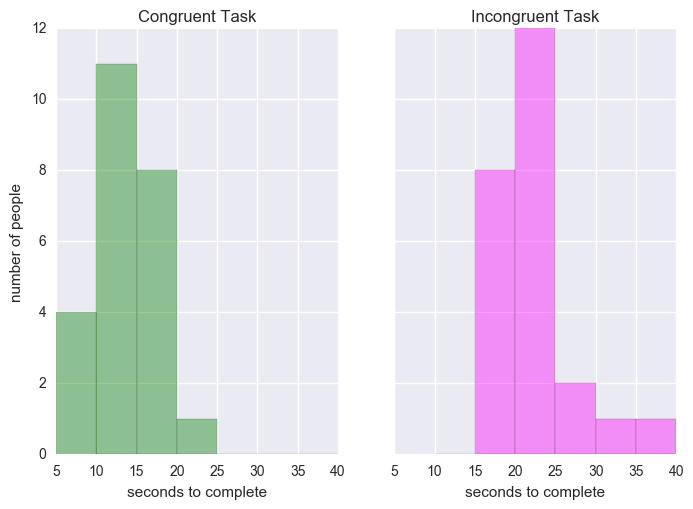

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

cong = stroop['Congruent']
incong = stroop['Incongruent']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax1, kde=False)
ax1.set_title("Congruent Task")
ax1.set_ylabel("number of people")
ax1.set_xlabel("seconds to complete")

sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax2, kde=False)
ax2.set_title("Incongruent Task")
ax2.set_xlabel("seconds to complete")

plt.show()

Clearly the Incongruent task is taking longer to complete for most participants. This supports the statistical test I expect to conduct to see whether or not the mean time to complete the incongruent task is significantly more than that of the Congruent task. Based on the appearance of these distributions I believe it is acceptable to use the parameters I calculated in Question 3 when conduting a hypothesis test. 

A boxplot with a swarmplot superimposed would also be a helpful way to visualize the different central tendency of the two sample means:

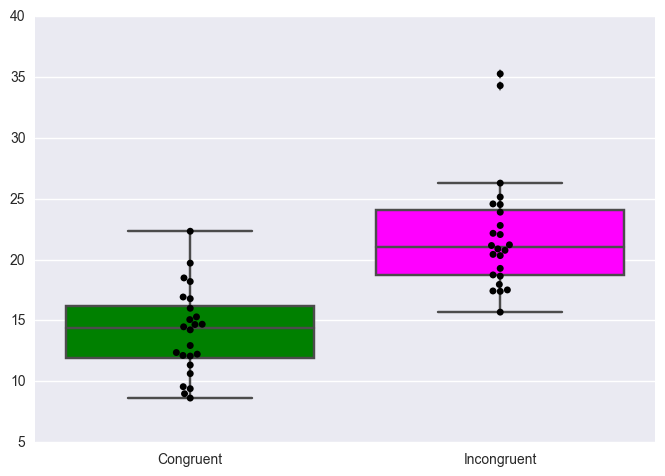

In [45]:
ax = sns.boxplot(data=stroop)
ax = sns.swarmplot(data=stroop, color='.0')

mybox = ax.artists[0]
mybox.set_facecolor('green')

mybox = ax.artists[1]
mybox.set_facecolor('magenta')

plt.show()

Finally, a Normal Quantile-Quantile plot can support the assumption that both the Congruent and Incongruent populations are normally distributed: 

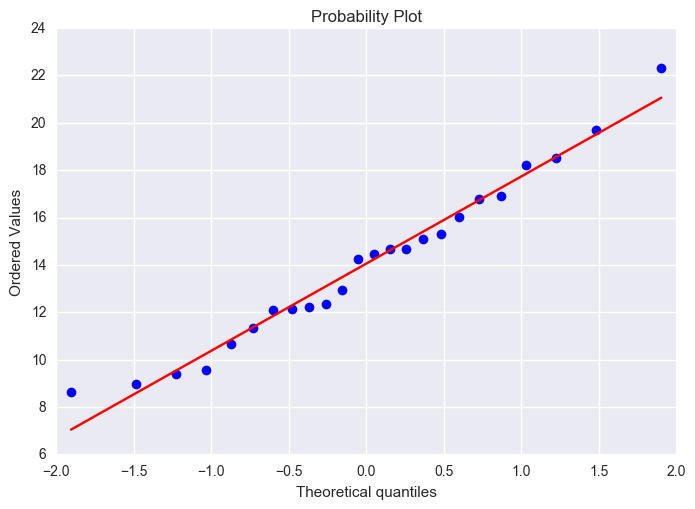

In [46]:
# the Congruent set
from scipy import stats as scistats

res1 = scistats.probplot(stroop['Congruent'], plot=plt)
plt.show()

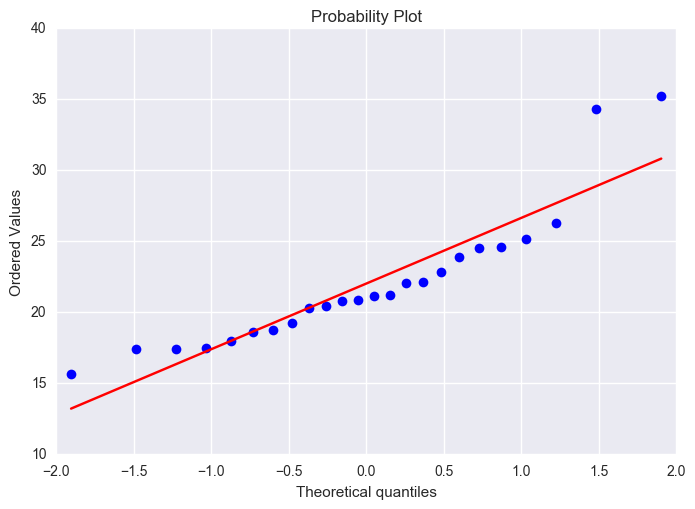

In [47]:
# the Incongruent set
res2 = scistats.probplot(stroop['Incongruent'], plot=plt)
plt.show()

The Incongruent set has a couple of outliers, but it still seems acceptable to consider it as normally distributed:

##### University of Washington data set visualization

Although the sample sizes are vastly different, I think it would be interesting to plot the UW data set against the Udacity data set. The below dataframe calculates the difference in time between the congruent and incongruent tasks for the Udacity data set (first five rows are displayed).

In [48]:
for row in stroop:
    stroop['Difference'] = abs(stroop['Congruent'] - stroop['Incongruent'])
stroop.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


The below histograms constrain both data sets to bin sizes at five-second intervals. 

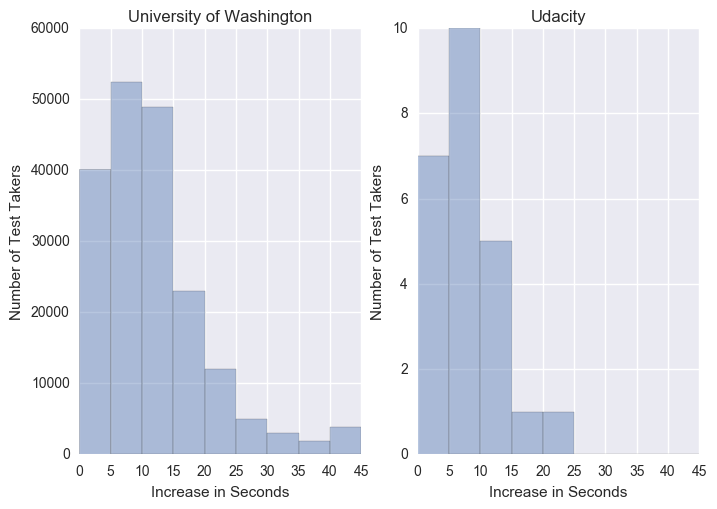

In [49]:
# plot the grouped differences in time for both the University of Washington data and the Udacity data
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey = False)

sns.distplot(midpoint, hist_kws={'weights':uw_grouped_data['Total']}, bins=range(0,50,5), ax=ax1, kde=False)
ax1.set_xlabel("Increase in Seconds")
ax1.set_ylabel("Number of Test Takers")
ax1.set_title("University of Washington")

sns.distplot(stroop['Difference'], bins=range(0,50,5), ax=ax2, kde=False)
ax2.set_xlabel("Increase in Seconds")
ax2.set_ylabel("Number of Test Takers")
ax2.set_title("Udacity")

plt.show()

The two distributions look similar, though I suspect the mean of the UW set is higher given the positive skew of the distribution. Although this is interesting to visualize I don't believe it is appropriate to continue any analysis given the possible inaccuracies of the UW sample and the difference in sample size between the two sets.

### Question 5:
** *Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?* **

The assumptions for this two-tailed pooled-variance t-test are:
* Independent simple random samples
* Normally distributed populations
* Equal population variances

The main question addressed is, are we unlikely to observe a difference of this size due to chance alone? Is there strong evidence that the population mean of the Congruent task is not equal to the population mean of the Incongruent task? It may also be interesting to know *how* much on average do the two populations means differ based on the two sample sets we have.

To review, the parameters necessary for the test are:
* Let X = the time to name the colors from a Congruent set words list

* Let Y = the time to name the colors from a Incongruent set words list

* Let $t^*=t_{n_1-n_2-2\text{, } 0.025}$

Congruent group: $\bar{x} = 14.0511$, $\hat{s}_x^2 \approx 12.6690$, $\hat{s}_x = 3.5594$, $n_x = 24$

Incongruent group: $\bar{y} = 22.0159$, $\hat{s}_y^2 \approx 23.0118$, $\hat{s}_y = 4.7971$, $n_y = 24$

Also, we have SMALL samples, and only point-estimates for population paramters. The standardized estimator and distribution for $\mu_x - \mu_y$ is:

$$\frac{\bar{X}-\bar{Y} - (\mu_x-\mu_y)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \sim t^*$$

##### Initial Calculations:
Note, all calculations are approximations.

Pooled variance: A weighted average of the individual samples' variances. Pooled sample variance for the unbiased estimator is denoted $s_p^2$. 

$$ \hat{s}_p^2 = \frac{(n_x-1)\hat{s}_x^2+(n_y-1)\hat{s}_y^2}{n_x+n_y-2}$$

Here we have:
$$ \hat{s}_p^2 \approx \frac{(24-1)12.6690+(24-1)23.0118}{24+24-2}$$

$$\approx 17.8404$$

Standard error of the estimator: The standard error of the sample means. We can use the standard error in our inference procedure calculations.

$$SE(\bar{x} - \bar{y}) = \hat{s}_p\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}$$

Here we have:

$$SE(\bar{x} - \bar{y}) \approx \sqrt{17.8404}\sqrt{\frac{1}{24}+\frac{1}{24}}$$

$$\approx 1.2193$$

Degrees of freedom: based on sizes of samples.

$$DF = n_x+n_y-2$$

Here we have: $$DF = 24+24-2 = 46 \text{ degrees of freedom}$$

46 degrees of freedom corresponds to a t statistic of approximately 2.0129.

In [50]:
scistats.t.ppf(1-0.025, 46)

2.0128955952945886

##### Hypothesis test:
Create a decision rule to either reject the null hypothesis or fail to reject the null hypothesis using a 95% confidence interval for the difference between $\bar{x}$ and $\bar{y}$.
$$H_0:\mu_x=\mu_y \text{ versus } H_1:\mu_x \ne \mu_y$$

There is a 5% probability that we reject the null hypothesis given the null hypothesis is true:
$$0.05 = P(\text{reject }H_0|H_0\text{ is true})$$

Focusing only on the interval for which $H_0$ could be rejected in a two-tailed hypothesis test we have the absolute value of the $t$ statistic greater than $t^*$.
$$= P(|t| > t^*)$$

Now showing $t$ as the standardized estimator:
$$=P \left( \left| \frac{\bar{X}-\bar{Y} - (\mu_x-\mu_y)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \right| > t^* \right)$$

Note $\mu_x - \mu_y$ has a hypothesized value of zero:

$$=P \left( \left| \frac{\bar{X}-\bar{Y} - (0)}{\hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} \right| > t^* \right)$$

$$=P \left( \left| \bar{X}-\bar{Y} \right| > t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}\right)$$

So we have two areas of focus on the t-distribution:

$$\bar{X}-\bar{Y} < -t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \text{ OR } \bar{X}-\bar{Y} > t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}$$

Our decision rule is to reject the null hypothesis $H_0$ if:
$$\bar{X}-\bar{Y} \notin \left(-t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \text{ , } t^* * \hat{S}_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}} \right)$$

Using our calculations for the appropriate degrees of freedom and the standard error of the estimator we have approximations of:

$$\bar{X}-\bar{Y} \notin \left(-2.0129 * 1.2193 \text{ , } 2.0129 * 1.2193 \right)$$

$$\bar{X}-\bar{Y} \notin \left(-2.4543 \text{ , } 2.4543 \right)$$

The conclusion for this hypothesis test at the $\alpha=0.05$ level is to reject the null hypothesis $H_0$ because:
$$\bar{X}-\bar{Y} = \bar{x}-\bar{y} = 14.0511-22.0159=-7.9648 \notin (-2.4543,2.4543)$$

##### Confidence interval for the difference between the two population means and conclusion

The 95% confidence interval is the difference between $\mu_x$ and $\mu_y$ plus or minus the t-statistic times the standard error. In this case, the difference of those two sample means is negative, so we focus on the left part of the tail of the t-distribution. We have:

$$\bar{x}-\bar{y} \pm -t^* * SE(\bar{x} - \bar{y})$$

$$14.0511-22.0159 \pm -2.0129*1.2193$$

$$-7.9648 \pm -2.4543$$

$$(-10.4191, -5.5105)$$

We can be 95% confidence that the difference between $\mu_x$ and $\mu_y$ ($\mu_x$ - $\mu_y$) lies somewhere in this interval. The test statistic for the difference between the two sample means is:

$$t = \frac{\bar{x}_1 - \bar{x}_2}{SE(\bar{x}_1 - \bar{x}_2)}$$

$$=\frac{14.0511-22.0159}{1.2193}$$

$$=-6.5323$$

The below code block calculates the p-value for the test statistic on this part of the t-distribution:

In [51]:
from scipy.stats import t

p_left = t.sf(6.5323, 46)
p_left

2.2970812327419461e-08

The left side p-value is approximately 0.00000002, or approximately 0. We can also note that the interval (-10.4191,-5.5105) lies to the left of zero on the t-distribution, so all plausible values of $\mu_x - \mu_y$ are less than zero. This interval indicates that the Congruent task takes less time to complete than the incongruent task ($\mu_x$ is less than $\mu_y$ on average).

Likewise, the interval for the difference between $\mu_y$ and $\mu_x$ for the right tail is:

$$\bar{y}-\bar{x} \pm t^* * SE(\bar{x} - \bar{y})$$

$$22.0159-14.0511 \pm 2.0129*1.2193$$

$$7.9648 \pm 2.4543$$

$$(5.5105, 10.4191)$$

We can be 95% confidence that the difference between $\mu_y$ and $\mu_x$ ($\mu_y$ - $\mu_x$) lies somewhere in this interval. 

The area to the right of this statistic mirrors the left and also approximates 0. The sum of the left and right p-value gives us 0.00000004, which is essentially zero. So there is very strong evidence against the null hypothesis in favor of the alternative hypothesis. Additionally, we can be 95% confident that, on average, the Incongruent task takes Stroop Effect test takers between 5.5 and 10.4 seconds longer than the Congruent task.

In conclusion, there is strong evidence that the Incongruent task takes longer than the Congruent task to complete.

### Question 6:
** *Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!* **

Intuitively I speculate that our brains are trained to recognize words and the pattern of unique words faster (with more priority) than that of colors. I can think of a similar task that would result in a similar effect, which may also provide some additional insights into how our brains behave.

I wonder if a test could be created to compare how fast our brains recognize words vs. objects. The [Rochester Institute of Technology](http://www.rit.edu/) has a page with some theoretical points on [the background of the Stroop Effect](https://www.rit.edu/cla/gssp400/sbackground.html). The most interesting to me is the 'Speed of Processing' model. Essentially, this model claims that word processing is much faster than color processing:

** *"The "Speed of Processing" hypothesis suggests that word processing is much faster than color processing. Thus, in a situation of incongruency between words and colors, when the task is to report the color, the word information arrives at the decision process stage earlier than the color information and results in processing confusion. On the other hand, when the task is to report the word, because the color information lags behind the word information, a decision can be made before the conflicting color information arrives."* **

I speculate that the congruent and incongruent tasks could be tested with a sufficiently large random sample, and compared against a similar test that uses stereotypical objects instead of words. For example, a [rubber ducky](https://img.clipartfest.com/521e9028ec01ceb8ed11bfe48db68b66_rubber-ducky-rubber-ducky_800-800.png) is iconically yellow. A [firetruck](http://images.clipartpanda.com/fire-truck-clipart-niXyyp7iB.gif) is iconically red, etc. Two conditions could be created for the experiment - a congruent and incongruent set. In the Incongruent set the rubber ducky may be blue, and the firetruck may be yellow. The results from the Stroop Effect test using word sets could be compared to the Stroop Effect test using stereotypical objecst. The difference between the two results may point to how quickly our brains process words versus how quickly they process objects.

##### Sources:
Some concepts and methods for the test of hypotheses were inspired by jbstatistics youtube video ["Pooled-Variance t Test and Confidence Intervals: Introduction](https://www.youtube.com/watch?v=NaZBdj0nCzQ&t=202s)